# Pymaceuticals Inc.
---

### Analysis

Infubinol has one potential outlier with a minimum value of 36.3213458. 
There appears to be a strong positive correlation between higher weight and higher tumor volume in mice on the Capomulin regimen. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [2]:
# Checking the number of mice.
mice_count = mouse_data_complete["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicate = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = mouse_data_complete.loc[(mouse_data_complete["Mouse ID"] == "g989"),:]
duplicate_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean = mouse_data_complete.drop_duplicates(subset=["Mouse ID"])
mice_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_reduced = len(mice_clean)
mice_reduced

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
                                
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_mean = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

regimen_median = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

regimen_variance = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

regimen_stdev = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

regimen_stderr = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()




# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame({"Mean Tumor Volume": regimen_mean, "Median Tumor Volume":regimen_median,
                               "Tumor Volume Variance": regimen_variance, "Tumor Volume Std. Dev.": regimen_stdev,
                               "Tumor Volume Std. Err.": regimen_stderr})



regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = mouse_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

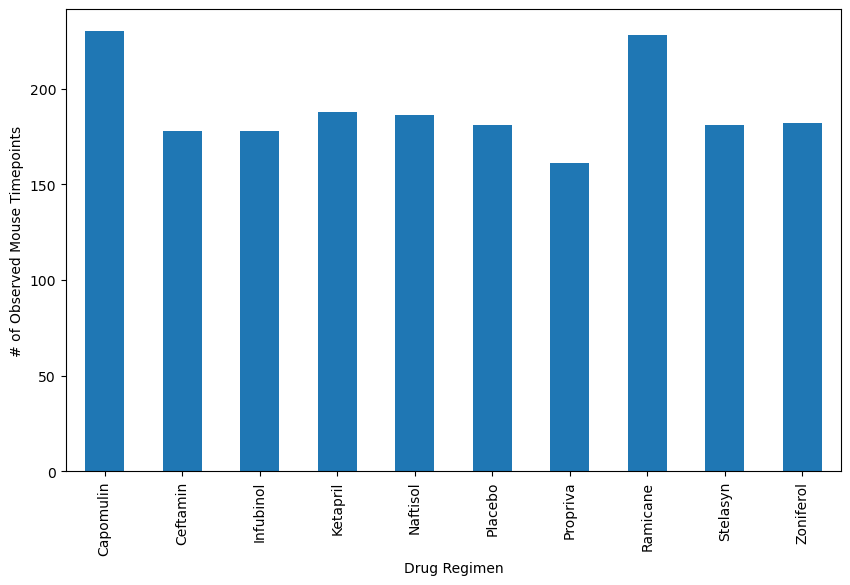

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug = mouse_data_complete.groupby("Drug Regimen")["Mouse ID"].count()
mice_per_drug.plot(kind="bar", figsize=(10,6), xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")
plt.show()

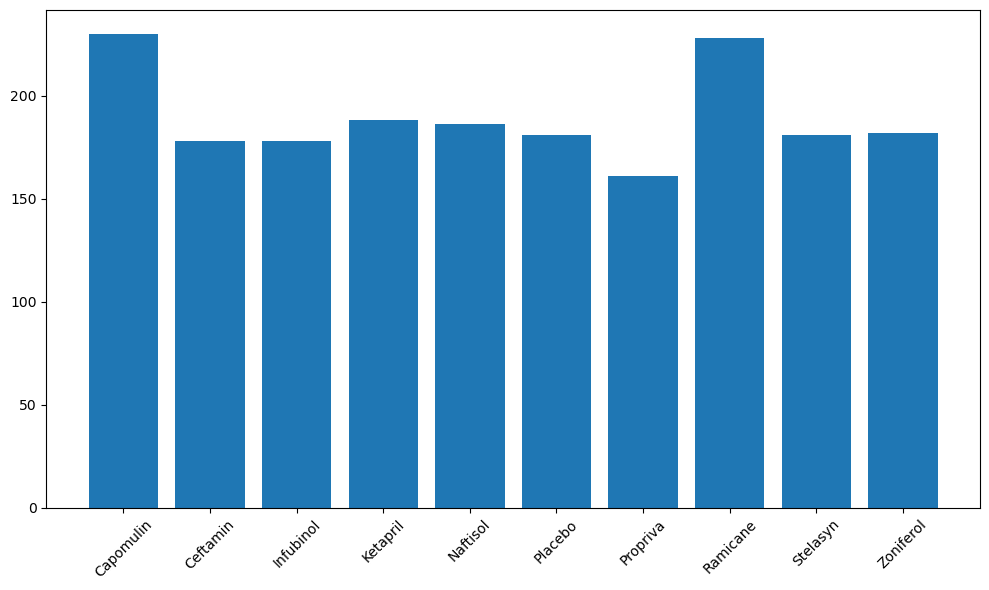

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis =np.arange(len(mice_per_drug))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,6)) 
plt.bar(x_axis, mice_per_drug)
plt.xticks
plt.xticks(tick_locations, mice_per_drug.index.values, rotation=45)
plt.tight_layout()
plt.show()


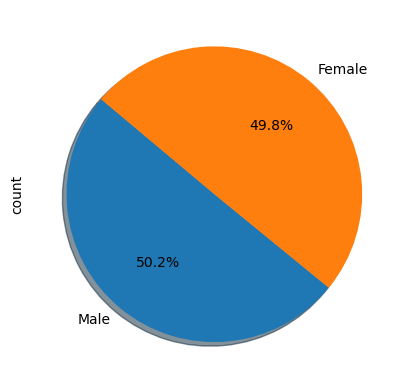

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = mice_clean.groupby("Mouse ID")["Sex"].sum()
sex_count=mice_sex.value_counts()
mice_sex_df = pd.DataFrame({"sex":["male", "female"],
                            "Count":[125,124]})
sex_count.plot.pie(labels=sex, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
                            


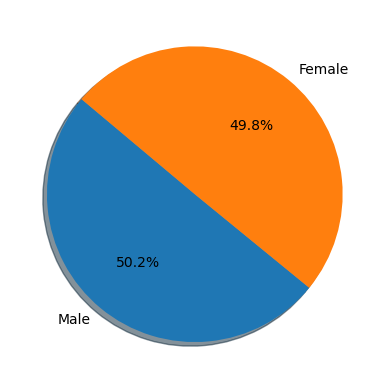

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
total_sex_count = [125,124]
plt.pie(total_sex_count, labels=sex, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_data_complete.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_timepoint = greatest_timepoint.to_frame().merge(mouse_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_mouse_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [91]:
# # Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
cef = []

    
# # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_mouse_timepoint.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
treatments_df = pd.DataFrame({"Capomulin": cap,
                       treatments[1]: ram,
                       treatments[2]: inf,
                       treatments[3]: cef
                       })

treatments_df


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [92]:
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = treatments_df["Capomulin"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumor volume for {'Capomulin'} is: {lowerq}")
print(f"The upper quartile of tumor volume for {'Capomulin'} is: {upperq}")
print(f"Values below {lower_bound} for {'Capomulin'} could be outliers.")
print(f"Values above {upper_bound} for {'Capomulin'} could be outliers.")



The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.


In [93]:
treatments_df["Capomulin"].min()

23.34359787

In [94]:
treatments_df["Capomulin"].max()

47.68596303

In [30]:
quartiles = treatments_df["Ramicane"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumor volume for {'Ramicane'} is: {lowerq}")
print(f"The upper quartile of tumor volume for {'Ramicane'} is: {upperq}")
print(f"Values below {lower_bound} for {'Ramicane'} could be outliers.")
print(f"Values above {upper_bound} for {'Ramicane'} could be outliers.")

The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.


In [42]:
treatments_df["Ramicane"].min()

22.05012627

In [43]:
treatments_df["Ramicane"].min()

22.05012627

In [95]:
quartiles = treatments_df["Infubinol"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumor volume for {'Infubinol'} is: {lowerq}")
print(f"The upper quartile of tumor volume for {'Infubinol'} is: {upperq}")
print(f"Values below {lower_bound} for {'Infubinol'} could be outliers.")
print(f"Values above {upper_bound} for {'Infubinol'} could be outliers.")

The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.


In [96]:
treatments_df["Infubinol"].min()

36.3213458

In [97]:
treatments_df["Infubinol"].max()

72.2267309

In [98]:
quartiles = treatments_df["Ceftamin"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumor volume for {'Ceftamin'} is: {lowerq}")
print(f"The upper quartile of tumor volume for {'Ceftamin'} is: {upperq}")
print(f"Values below {lower_bound} for {'Ceftamin'} could be outliers.")
print(f"Values above {upper_bound} for {'Ceftamin'} could be outliers.")

The lower quartile of tumor volume for Ceftamin is: 48.72207785
The upper quartile of tumor volume for Ceftamin is: 64.29983003
Values below 25.355449580000002 for Ceftamin could be outliers.
Values above 87.66645829999999 for Ceftamin could be outliers.


In [99]:
treatments_df["Ceftamin"].min()

45.0

In [100]:
treatments_df["Ceftamin"].max()

68.92318457

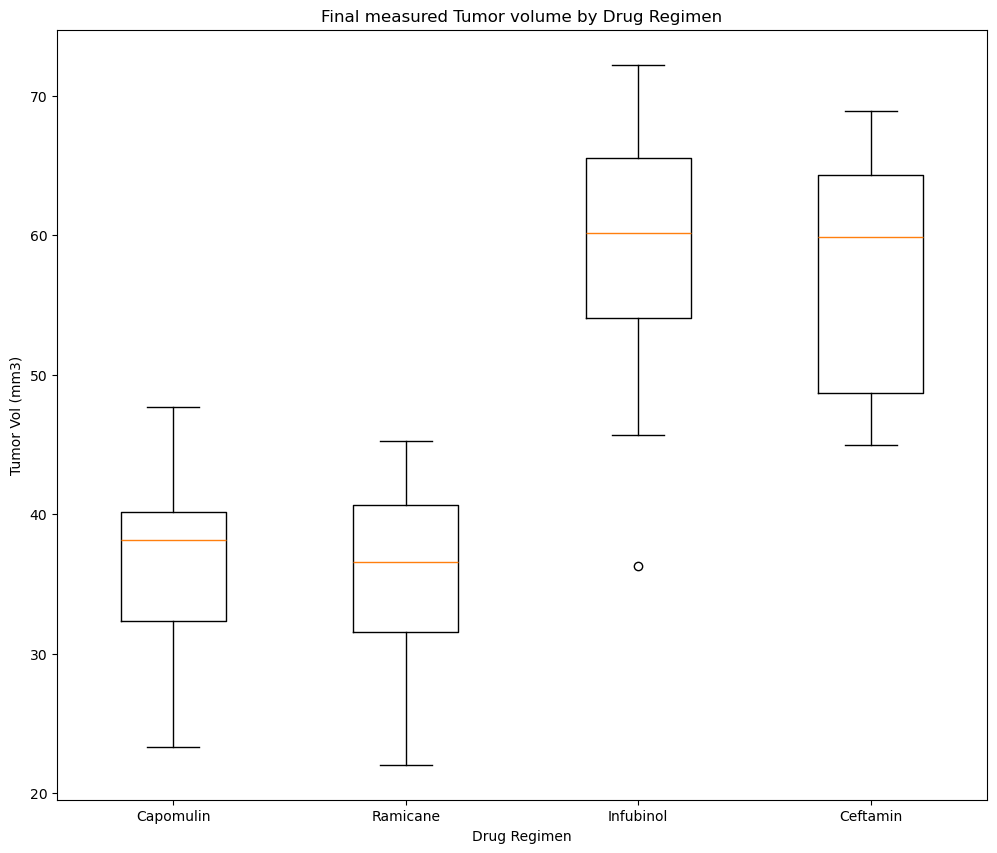

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [treatments_df[treatments[0]],
                treatments_df[treatments[1]],
                treatments_df[treatments[2]],
                treatments_df[treatments[3]]
               ]

fig1, ax = plt.subplots(figsize=(12,10))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list, 0)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

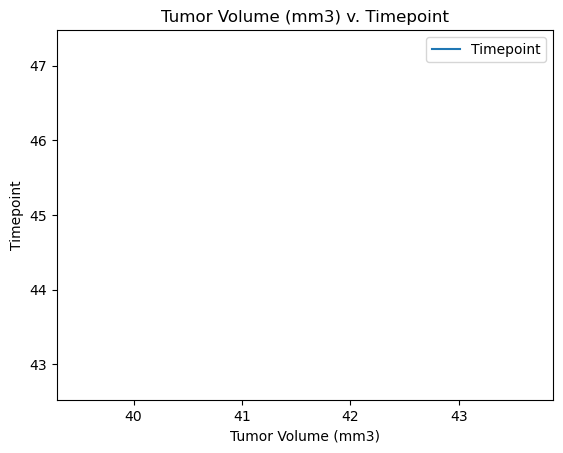

In [102]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df=merged_mouse_timepoint.loc[merged_mouse_timepoint["Drug Regimen"]=="Capomulin"]
cap_df
cap_mouse = cap_df.loc[cap_df["Mouse ID"] == "r944",:]
cap_mouse
cap_mouse.plot("Tumor Volume (mm3)", "Timepoint",kind = "line")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Tumor Volume (mm3) v. Timepoint")
plt.savefig("tumor vol v timepoint line")
plt.show()

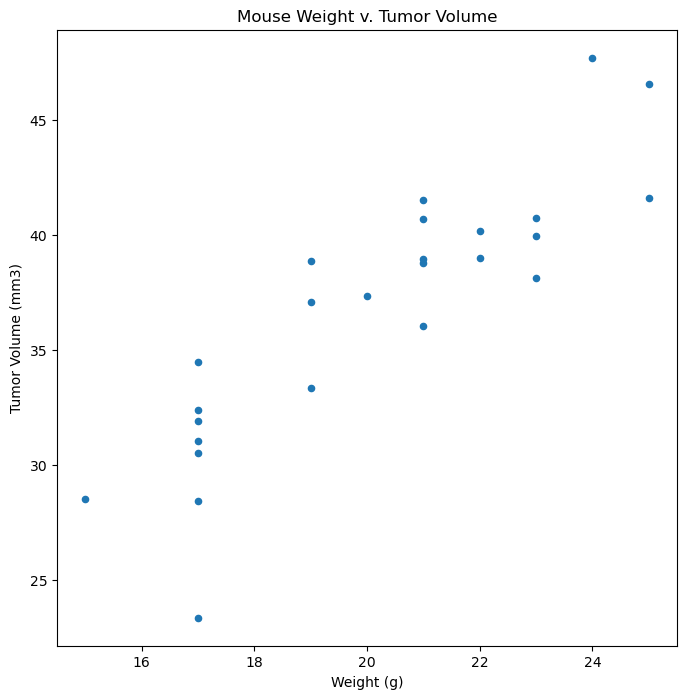

In [68]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(8,8), title="Mouse Weight v. Tumor Volume")
plt.show()


## Correlation and Regression

The r-squared is: 0.7686134812139006


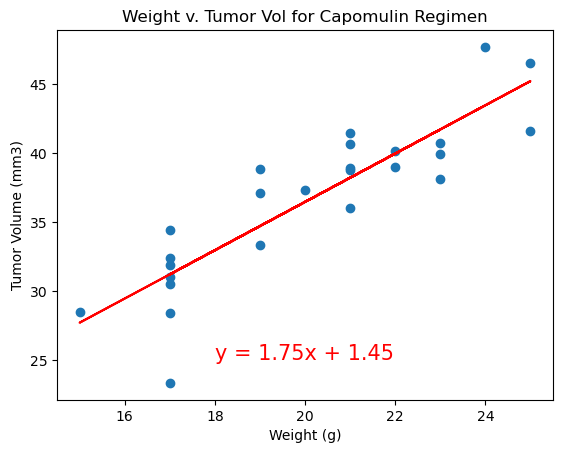

In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Linear regression on Northern Hemisphere
x_values = cap_df["Weight (g)"]
y_values = cap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,25),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight v. Tumor Vol for Capomulin Regimen')
print(f"The r-squared is: {rvalue**2}")
plt.show()